<a href="https://colab.research.google.com/github/damianmtz98/PyCdeD/blob/main/T4_ClasificacionImagenes_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np




In [2]:
# cargamos el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalizamos los valores de los pixeles
x_train = x_train / 255.0
x_test = x_test / 255.0

#  Conv2D requiere añadir una dimension extra para los canales
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# nombres de las clases en el dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

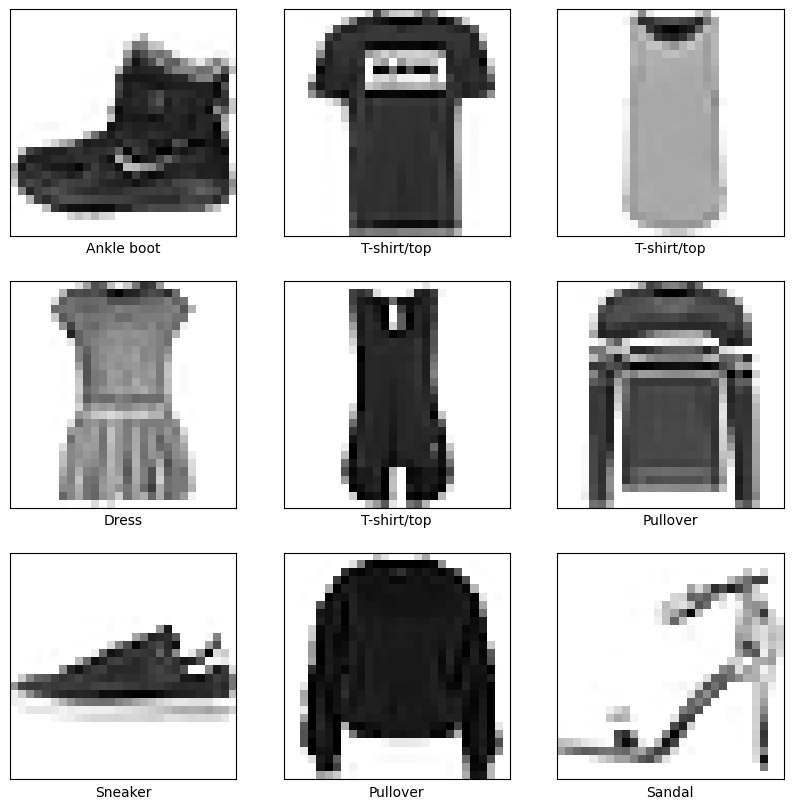

In [3]:
# mostramos las primeras imagenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [4]:
# configuramos el generador de imágenes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ajustamos el generador a los datos de entrenamiento
datagen.fit(x_train)


In [5]:
# contruimos el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# entrenamos el modelo
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))


Epoch 1/50
938/938 [==============================] - 89s 93ms/step - loss: 1.2215 - accuracy: 0.5497 - val_loss: 0.7032 - val_accuracy: 0.7228
Epoch 2/50
938/938 [==============================] - 88s 94ms/step - loss: 0.9115 - accuracy: 0.6636 - val_loss: 0.6392 - val_accuracy: 0.7560
Epoch 3/50
938/938 [==============================] - 86s 92ms/step - loss: 0.8381 - accuracy: 0.6859 - val_loss: 0.5881 - val_accuracy: 0.7622
Epoch 4/50
938/938 [==============================] - 86s 91ms/step - loss: 0.7918 - accuracy: 0.7060 - val_loss: 0.5551 - val_accuracy: 0.7843
Epoch 5/50
938/938 [==============================] - 85s 90ms/step - loss: 0.7678 - accuracy: 0.7155 - val_loss: 0.5460 - val_accuracy: 0.7884
Epoch 6/50
938/938 [==============================] - 83s 89ms/step - loss: 0.7339 - accuracy: 0.7321 - val_loss: 0.5584 - val_accuracy: 0.7850
Epoch 7/50
938/938 [==============================] - 83s 88ms/step - loss: 0.7104 - accuracy: 0.7390 - val_loss: 0.5532 - val_accuracy:

In [7]:
# evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - loss: 0.3821 - accuracy: 0.8587 - 3s/epoch - 9ms/step

Test accuracy: 0.8586999773979187


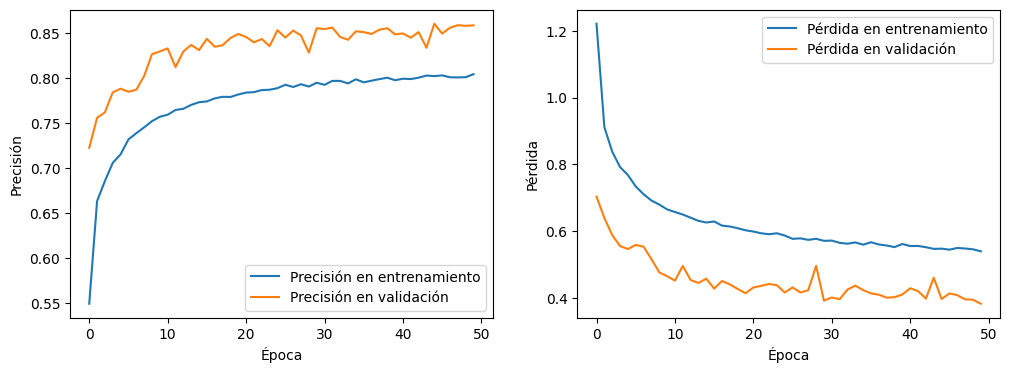

In [8]:
# visualizamos la precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')

plt.show()


313/313 [==============================] - 4s 11ms/step


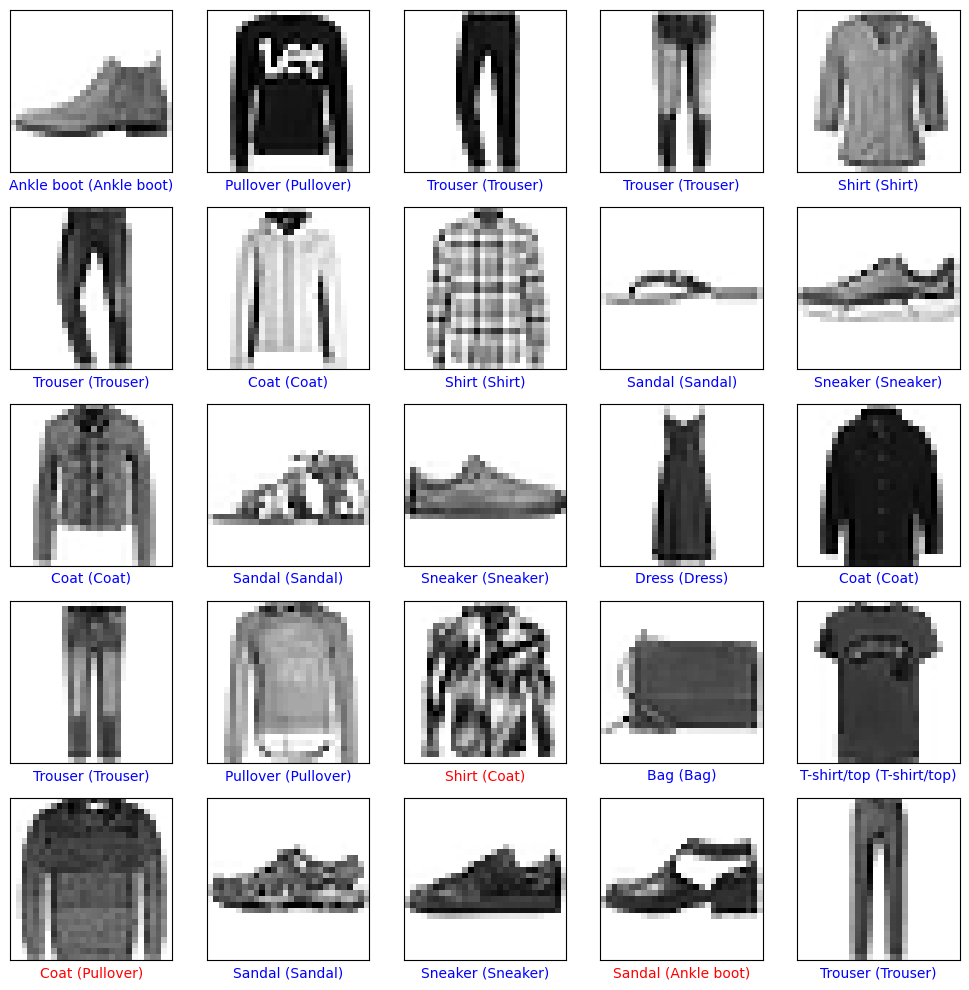

In [13]:
# realizamos predicciones
predictions = model.predict(x_test)

# aplicamos una función para mostrar una imagen de prueba y la predicción del modelo
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# mostramos algunas predicciones
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()
